
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E00_linear_regression.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Linear regression exercises

---
These are introductory exercises in Machine learning with focus in **linear regression** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Simulate phone dataset (*)

We want to simulate data $(x,y)$ to represent cost for phone subscriptions, with: 

- $x$ - called minutes per month
- $y$ - SEK per month 

&nbsp; a) Use ```numpy.random.normal()``` to simulate a dataset with the following requirements:(*)
- set a seed to 42 (for reproducibility and reference)
- simulate 400 x-values from the r.v. $X \sim \mathcal{N}(100, 100)$ 
- take absolute value of these x-values
- simulate noise 400 noise values from r.v. $\epsilon \sim \mathcal{N(0, 50)}$ 
- Let $y = 2x+25+\epsilon$
- plot the data set 

&nbsp; b) Now we want to remove some outliers according to this assumption: (*)
- no one talks more than 300 min using this type of subscription
- no ones costs can be negative
- plot the new dataset
- also plot ground truth using the true parameters $\beta_0 = 25, \beta_1 = 2$

&nbsp; c) Insert the values into a DataFrame (*)

<details>

<summary>Answer</summary>

<img src="../assets/simulated_phone_dataset_0.png" height="200"/>

a) 

Number of points x ≥ 300 min: 8

Number of points y < 0 kr: 6


b)

Length of x, outliers removed 386

Length of y, outliers removed 386

c)

df.head()

|    |   Minutes |     Cost |
|---:|----------:|---------:|
|  0 |   59.4428 | 168.721  |
|  1 |   40.0625 |  98.2118 |
|  2 |  100.524  | 258.433  |
|  3 |  104.698  | 310.548  |
|  4 |   54.9935 | 123.279  |


</details>

---

[Text(0.5, 0, 'minutes'), Text(0, 0.5, 'cost')]

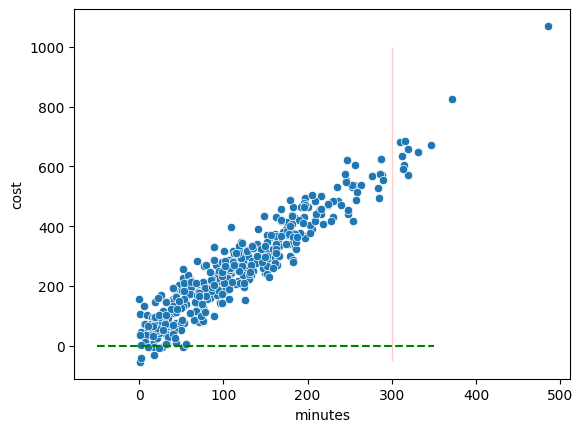

In [2]:
# a)
np.random.seed(42)

x_values = np.random.normal(100, 100, 400)

abs_x_values = np.abs(x_values)

noise = np.random.normal(0, 50, 400)

y_values = 2 * abs_x_values + 25 + noise

line1 = np.linspace(-50, 350, 40) ##

ax = sns.scatterplot(x=abs_x_values, y=y_values)
# sns.lineplot(x=abs_x_values, y=abs_x_values*2+25, color='red')
sns.lineplot(x=line1, y=0, color='green', linestyle='--')
sns.lineplot(x=300, y=[-50, 1000], color='red', linestyle='--')
ax.set(xlabel='minutes', ylabel='cost')

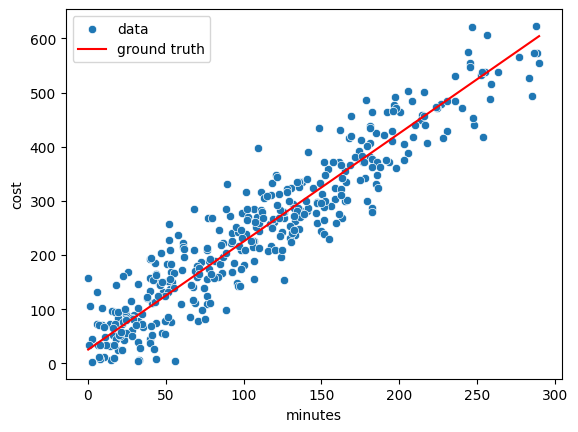

In [3]:
# b)
df = pd.DataFrame({'minutes': abs_x_values, 'cost': y_values})
df = df[(df['minutes'] > 0) & (df['minutes'] < 300) & (df['cost'] > 0)]

ax = sns.scatterplot(x="minutes", y="cost", data=df)
sns.lineplot(data=df, x=df["minutes"], y=df["minutes"]*2+25, color='red')
ax.set(xlabel='minutes', ylabel='cost')
ax.legend(['data', 'ground truth'])

In [4]:
# c)
df.head()
# df.describe()


,minutes,cost
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


## 1. Train|test split (*)

Before moving on with linear regression we shall first perform a train-test-split. 

&nbsp; a) Create a train-test-split function with the following call signature: (*)

```py
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction=.7: float, random_state=42: int, replace=False: bool) -> tuple
```

that returns the tuple:
```
(X_train, X_test, y_train, y_test)
```

&nbsp; b) Now use this to split up your data into a training set and test set. Check manually that the split is performed correctly. (*)


<details>

<summary>Hint</summary>

b) Check the length of each set, and check the indices of the sorted sets that they don't overlap and are not missing. Also check that they sum up to what you expect.

</details>

<br/>

<details>

<summary>Answer</summary>

Using default 0.7: 
- length of X_train: 270
- length of X_test: 116
- length of y_train: 270
- length of X_test: 116

</details>

---

In [16]:
# a)
def train_test_split(df, col=-1, train_fraction=0.7, random_state=42, replace=False, intercept=True):
    np.random.seed(random_state)
    
    frac = train_fraction * len(df)
    
    train = df.sample(n=int(frac), random_state=random_state, replace=replace)
    test = df.drop(train.index)
    # print(train.shape, test.shape)
    
    col = df.columns[col]
    
    X_train, y_train = train.drop(col, axis = "columns"), train[col]
    X_test, y_test = test.drop(col, axis = "columns"), test[col]
    
    if intercept:
        X_train.insert(0, "Intercept", 1)
        X_test.insert(0, "Intercept", 1)
    
    # for dataset in [X_train, X_test, y_train, y_test]:
    #     print(f"{dataset} got shape: {dataset.shape}")
    
    return X_train, y_train, X_test, y_test

train_test_split(df)

(     Intercept     minutes
 277          1   39.978312
 196          1   11.614256
 46           1   53.936123
 55           1  193.128012
 57           1   69.078762
 ..         ...         ...
 41           1  117.136828
 306          1  227.766490
 211          1  213.556564
 264          1   74.743185
 348          1   28.155578
 
 [266 rows x 2 columns],
 277    192.570147
 196     34.734766
 46     151.202158
 55     371.612382
 57     111.395409
           ...    
 41     257.638919
 306    416.511512
 211    449.333894
 264    138.844081
 348     50.735266
 Name: cost, Length: 266, dtype: float64,
      Intercept     minutes
 1            1   86.173570
 4            1   76.584663
 8            1   53.052561
 13           1   91.328024
 14           1   72.491783
 ..         ...         ...
 390          1   10.158533
 393          1  283.145877
 397          1  235.387237
 398          1   88.546015
 399          1  223.781631
 
 [115 rows x 2 columns],
 1      167.378389
 4  

## 2. Simple linear regression with normal equation (*)

Use the normal equation for simple linear regression to solve for the coefficients $\hat{\beta} = (\beta_0, \beta_1)$. Note that you should only use the training data to fit the regression line, and not data from the test set. Plot the the regression line, together with ground truth and training data. 

<details>

<summary>Hint</summary>

It is important to keep track of the shapes of the vectors, matrices in order for matrix multiplication matmul "@" to work correctly. Also, if you have series object, you need to convert it to numpy. 

</details>

<br/>

<details>

<summary>Answer</summary>


<img src="../assets/Reg_line_normal_eq.png" height="200"/>

</details>

---

     Intercept     minutes
277          1   39.978312
196          1   11.614256
46           1   53.936123
55           1  193.128012
57           1   69.078762
..         ...         ...
41           1  117.136828
306          1  227.766490
211          1  213.556564
264          1   74.743185
348          1   28.155578

[266 rows x 2 columns] got shape: (266, 2)
     Intercept     minutes
1            1   86.173570
4            1   76.584663
8            1   53.052561
13           1   91.328024
14           1   72.491783
..         ...         ...
390          1   10.158533
393          1  283.145877
397          1  235.387237
398          1   88.546015
399          1  223.781631

[115 rows x 2 columns] got shape: (115, 2)
277    192.570147
196     34.734766
46     151.202158
55     371.612382
57     111.395409
          ...    
41     257.638919
306    416.511512
211    449.333894
264    138.844081
348     50.735266
Name: cost, Length: 266, dtype: float64 got shape: (266,)
1      1

<Axes: xlabel='minutes', ylabel='cost'>

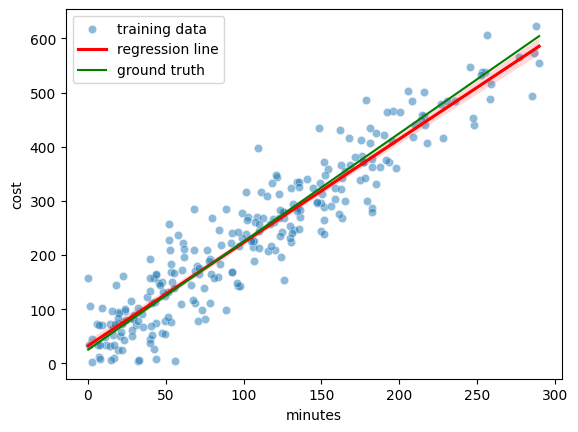

In [6]:
x_train, y_train, x_test, y_test = train_test_split(df)

regression_fit = lambda x, y: np.linalg.inv(x.T @ x) @ x.T @ y # Här förstod jag inte riktigt.

sns.scatterplot(x=x_train["minutes"], y=y_train, label='training data', alpha=0.5)
sns.regplot(x=x_train["minutes"], y=y_train, scatter=False, label='regression line', color='red')
# sns.lineplot(x=x_train["minutes"], y=y_train, label='regression line', color='red')
sns.lineplot(x=df["minutes"], y=df["minutes"]*2+25, label='ground truth', color='green')

## 3. Prediction and evaluation (*)

&nbsp; a) Use your model to make prediction on testing data. Plot the prediction cost against X_test, and y_test against X_test. (*)

&nbsp; b) Calculate MAE, MSE, RMSE (*)

<details>

<summary>Hint</summary>

Calculate y_pred from X_test and use y_test and y_pred to compute different evaluation metrics.

Careful with dimensions when computing the evaluation metrics, else it can be catastrophical logical errors due to numpy broadcasting feature.

Note that after you have calculate the error metrics on test data you are not allowed to change any parameters to make the line fit better to the testing data.

</details>

<br/>

<details>

<summary>Answer</summary>

a) 

<img src="../assets/eval_simple_lin_reg.png" height="200"/>

b)

Mean absolute error on testing data: 36.97 kr

Mean squared error on testing data: 2374 kr^2

Root mean squared error on testing data: 48.72 kr

</details>

---

In [7]:
beta = regression_fit(x_train, y_train)
print(f"Regression coefficients: {beta.values}")

predict = lambda x, weights: x @ weights

y_hat = predict(x_test.to_numpy(), np.reshape(beta.to_numpy(), (2, 1)))

print(f"Shape of y_hat: {y_hat.shape}")

print(f"First 5 predictions: {y_hat[:5]}")

y_hat = np.reshape(y_hat, (len(y_hat)))

MAE = 1 / len(y_test) * np.mean(np.abs(y_test - y_hat))
MSE = 1 / len(y_test) * np.mean((y_test - y_hat)**2)
RMSE = np.sqrt(MSE)

print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")

Regression coefficients: [32.22147722  1.91050591]
Shape of y_hat: (115, 1)
First 5 predictions: [[196.85659218]
 [178.53692796]
 [133.57870958]
 [206.70420815]
 [170.71745789]]
MAE: 0.3488697957521054
MSE: 20.88327938145851
RMSE: 4.569822685997621


## 4. Simulate more explanatory variables (\*)

Now we will simulate the explanatory variables for minutes, text messages and amount of surf. For reference and reproducibility use numpy random seed 42. Assume there is:

- mean start cost: 25kr
- mean cost per minute: 2kr
- mean cost per sms: 50 öre
- mean cost per GB: 50kr

Then the model for the cost will be:
$y = 25 + 2x_1 + 0.5x_2 + 50x_3 + \epsilon$, where

- $x_i$ sampled from r.v. $X_i$ for $i = \{1,2,3\}$
- $X_1 \sim |\mathcal{N}(100,100)|$, (absolute value)
- $X_2 \sim \mathcal{U}(0,50)$, (discrete uniform distribution)
- $X_3 \sim |\mathcal{N}(0,2)|$,
- $\epsilon \sim \mathcal{N}(0,50)$

&nbsp; a) Simulate 10000 samples of each of $x_1, x_2, x_3$ and $y$ and save them in a DataFrame. Also add an intercept column containing ones. (\*)

&nbsp; b) Make histograms for each of the explanatory variables $x_1, x_2, x_3$ and the response variable $y$ (\*)

&nbsp; c) Clean the data using the following constraints (\*)

- surf should be less than 4
- minutes should be less than 300
- cost should be larger than 0

&nbsp; d) Make new histograms for the variables. (\*)

<details>

<summary>Hint</summary>
Your data analysis skill toolbox together with statistics and linear algebra skills are getting quite handy here.

</details>

<br/>

<details>

<summary>Answer</summary>

a)

|      | Intercept | Minutes | SMS | Surf (GB) |    Cost |
| ---: | --------: | ------: | --: | --------: | ------: |
|    0 |         1 | 149.671 |  41 |   2.26301 | 502.396 |
|    1 |         1 | 86.1736 |  16 | 0.0315695 | 179.072 |
|  ... |       ... |     ... | ... |       ... |     ... |
| 9318 |         1 | 149.577 |  31 |   3.43929 | 536.176 |
| 9319 |         1 | 164.439 |  43 |   1.40641 | 406.674 |

b)

<img src="../assets/hist_variables.png" height="200"/>

d)

<img src="../assets/hist_var_cleaned.png" height="200"/>

</details>

---


In [8]:
#a)
np.random.seed(42)

x1 = abs(np.random.normal(100, 100, 10000))
x2 = np.random.uniform(0, 50, 10000)
x3 = abs(np.random.normal(0, 2, 10000))
noise = np.random.normal(0, 50, 10000)

y2 = 25 + 2*x1 + 0.5*x2 + 50*x3 + noise

df2 = pd.DataFrame({'minutes': x1, 'SMS': x2, 'surf': x3, 'cost': y2})
df2.insert(0, "Intercept", 1)

In [9]:
df2.head()

,Intercept,minutes,SMS,surf,cost
0,1,149.671415,16.062759,0.958919,397.262506
1,1,86.173570,5.150960,2.056136,282.885394
2,1,164.768854,3.590377,1.004004,458.575762
3,1,252.302986,4.713799,3.413725,665.771078
4,1,76.584663,29.143468,0.535679,154.615402


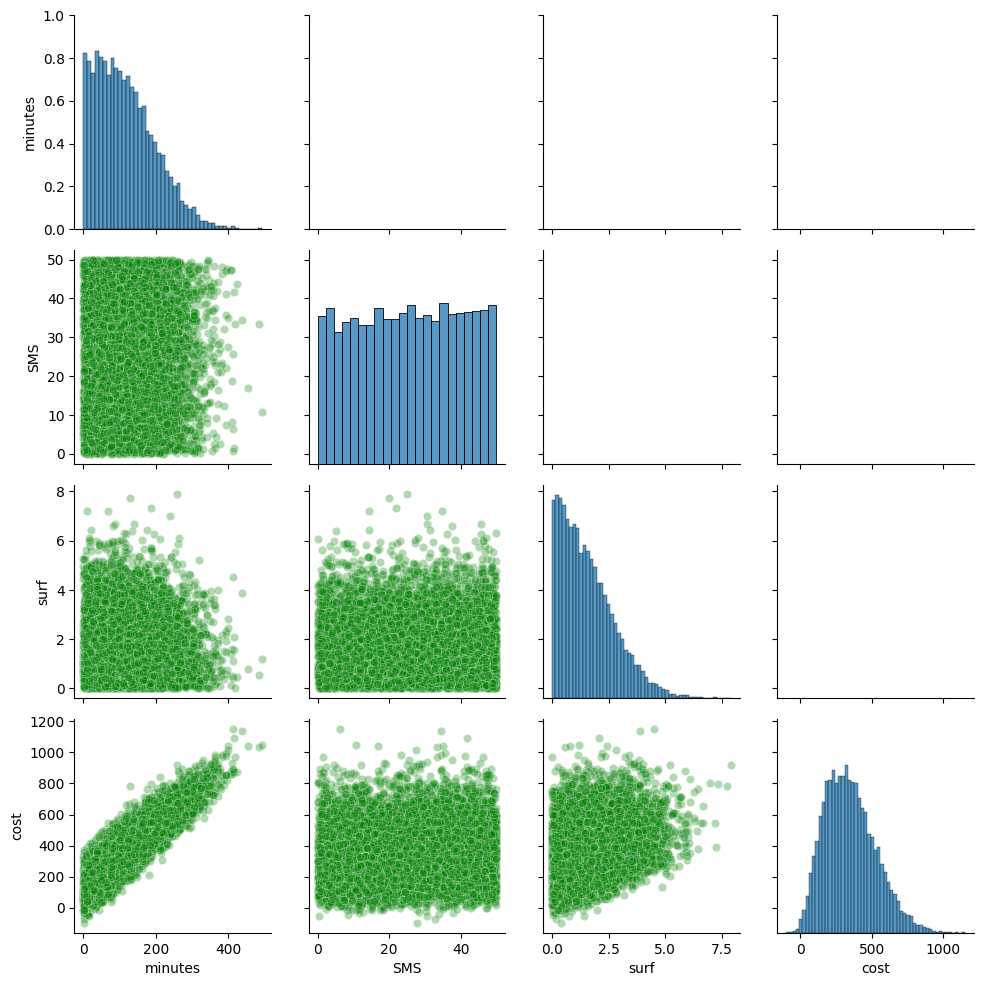

In [10]:
# b)
g = sns.PairGrid(df2[["minutes", "SMS", "surf", "cost"]])
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot, alpha=0.3, color='green')


In [11]:
# c)
print(len(df2))
df2 = df2[(df2['surf'] < 4) & (df2['minutes'] < 300) & (df2['cost'] > 0)]
print(len(df2))

10000
9320


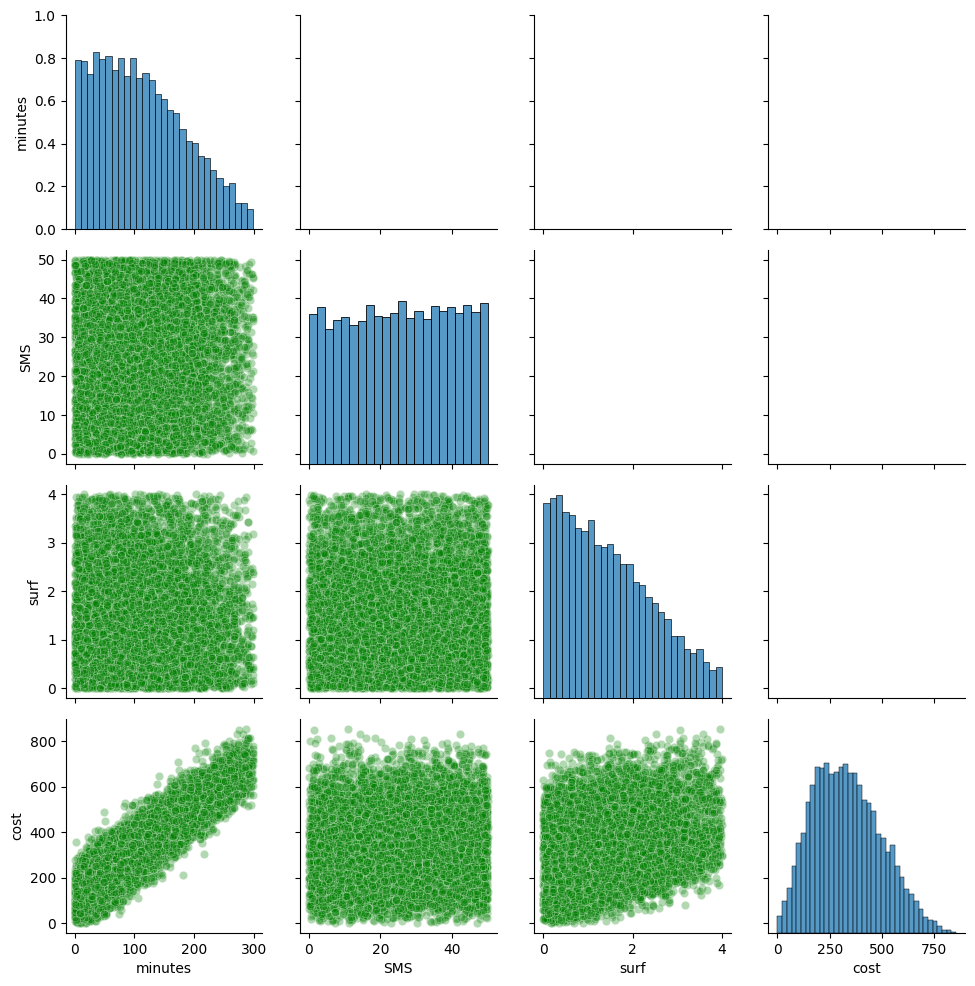

In [12]:
# d)
g = sns.PairGrid(df2[["minutes", "SMS", "surf", "cost"]])
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot, alpha=0.3, color='green')

## 5. Multiple linear regression (*)

&nbsp; a) Perform a train|test split with 0.8 of the data for training. (*)

&nbsp; b) Use the normal equation to compute $\hat{\beta}$ (*)

&nbsp; c) Predict on the test data and compute MAE, MSE and RMSE. (*)

&nbsp; d) Now repeat 4a), 4c), 5a), 5b) using 10, 100, 1000, 10000, 100000, 1000000 samples, and calculate RMSE for each of these simulations. Plot the RMSE against sample size. (**)


<details>

<summary>Hint</summary>

It is important to keep track of the shapes of the vectors, matrices in order for matrix multiplication matmul "@" to work correctly. Also, if you have series object, you need to convert it to numpy. 

</details>

<br/>

<details>
<summary>Answer</summary>


<img src="../assets/RMSE_simulation.png" height="200"/>

</details>

In [20]:
# a)
beta_n_train, cost_train, beta_n_test, cost_test = train_test_split(df2, intercept=False, train_fraction=0.8)

In [27]:
# b)
regression_fit = lambda x, y: np.linalg.pinv(x.T @ x) @ x.T @ y
beta_hat = regression_fit(beta_n_train, cost_train)

# c)
predict = lambda x, beta: np.dot(x, beta)

cost_hat = predict(beta_n_test, beta_hat)

MAE = 1 / len(cost_test) * np.sum(np.abs(cost_test - cost_hat))
MSE = 1 / len(cost_test) * np.sum((cost_test - cost_hat)**2)
RMSE = np.sqrt(MSE)

print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")

MAE: 39.91047313658663
MSE: 2477.8016469103704
RMSE: 49.777521502284245


In [ ]:
# d)


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---